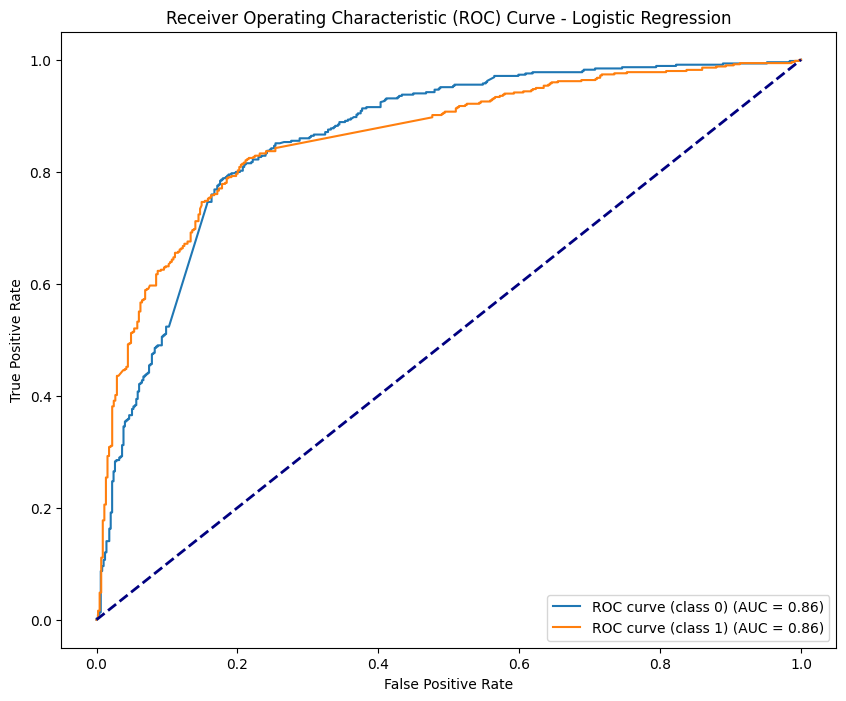

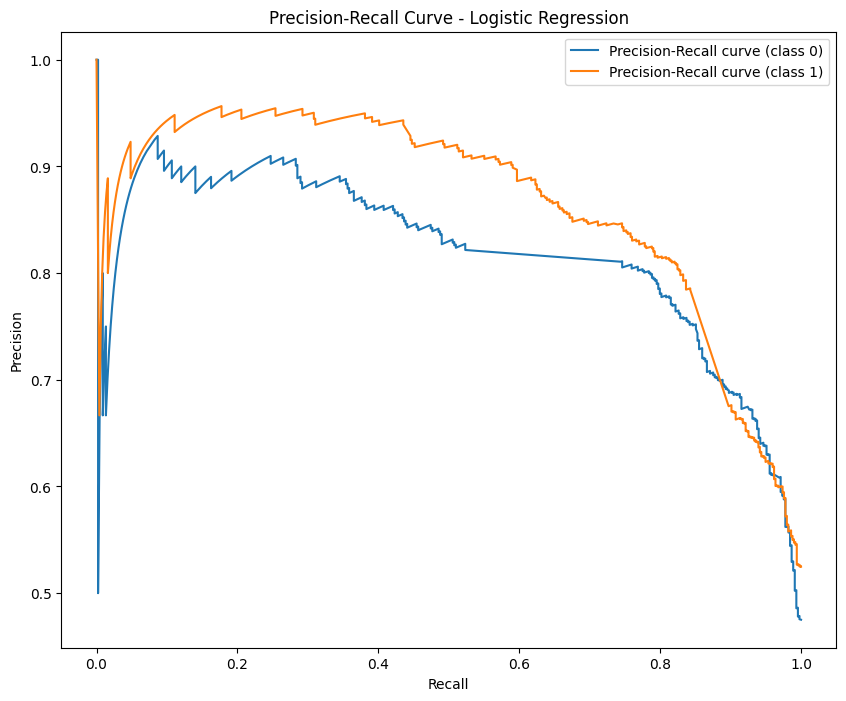

Confusion Matrix (Logistic Regression) - Test Set:
 [[382  67]
 [128 368]]


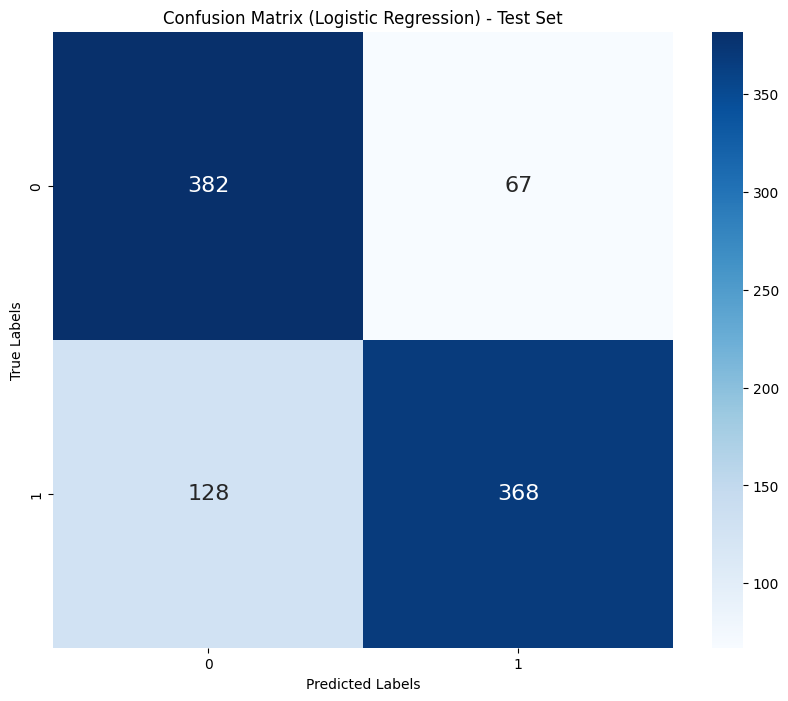

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

        Info       0.75      0.85      0.80       449
         Lit       0.85      0.74      0.79       496

    accuracy                           0.79       945
   macro avg       0.80      0.80      0.79       945
weighted avg       0.80      0.79      0.79       945



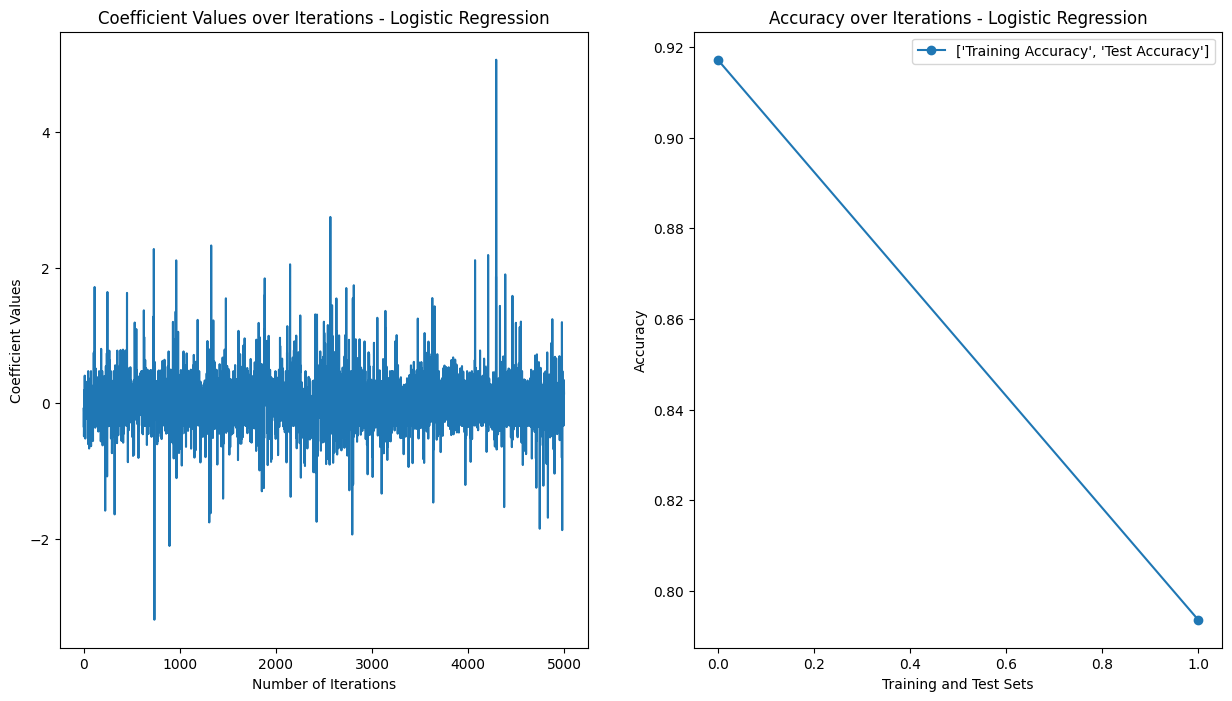

Predictions for New Data (Logistic Regression): ['Lit']


['lr_model.joblib']

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Import the files module from google.colab

# Load your data
file_path = 'full_merged_file.xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(file_path)

# Assuming you have a column 'Description' containing the text data and a column 'Category' with multiple classes
X = df['Description'].fillna('')  # Replace NaN values with an empty string
y = df['Category']

# Binarize the labels for a multiclass problem
y_binary = label_binarize(y, classes=df['Category'].unique())

# Vectorize the text data (convert text to numerical features)
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_vec, y)

# Save the trained model using joblib
model_filename = 'naive_bayes_model.joblib'
joblib.dump(classifier, model_filename)

# Predictions on the test set
y_pred = classifier.predict(X_vec)

# Evaluate the classifier on the training set (you might want to split into train/test for a more meaningful evaluation)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy on Training Set: {accuracy:.2f}')

# Classification report
print('Classification Report:\n', classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
y_prob = classifier.predict_proba(X_vec)
fpr, tpr, _ = roc_curve(y_binary.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_binary.ravel(), y_prob.ravel())
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# Accuracy and Loss Graphs
epochs = 30
losses = []

for epoch in range(epochs):
    classifier.partial_fit(X_vec, y, classes=df['Category'].unique())
    y_pred = classifier.predict(X_vec)
    losses.append(accuracy_score(y, y_pred))

plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.show()

# New Data for Prediction
new_data = ["حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے"]

# Vectorize the new data
new_data_vec = vectorizer.transform(new_data)

# Predictions on the new data
new_data_pred = classifier.predict(new_data_vec)

# Print predictions for the new data
print('Predictions for New Data:')
for text, pred in zip(new_data, new_data_pred):
    print(f'Text: {text}, Predicted Category: {pred}')

# Download the model file
files.download(model_filename)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load your data
file_path = 'full_merged_file.xlsx'
df = pd.read_excel(file_path)

X = df['Description'].fillna('')
y = df['Category']

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Predictions on the test set
y_prob_test_lr = lr_classifier.predict_proba(X_test)

# Plot ROC Curve for all classes in one graph
plt.figure(figsize=(10, 8))
for i in range(len(lr_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == lr_classifier.classes_[i], y_prob_test_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve for all classes in one graph
plt.figure(figsize=(10, 8))
for i in range(len(lr_classifier.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == lr_classifier.classes_[i], y_prob_test_lr[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve (class {i})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='upper right')
plt.show()

# Confusion matrix for the test set
conf_matrix_test_lr = confusion_matrix(y_test, lr_classifier.predict(X_test))
print('Confusion Matrix (Logistic Regression) - Test Set:\n', conf_matrix_test_lr)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test_lr, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix (Logistic Regression) - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print('Classification Report (Logistic Regression):\n', classification_report(y_test, lr_classifier.predict(X_test)))

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(lr_classifier.coef_.flatten())  # You can customize this to your needs
plt.xlabel('Number of Iterations')
plt.ylabel('Coefficient Values')
plt.title('Coefficient Values over Iterations - Logistic Regression')

plt.subplot(1, 2, 2)
accuracy_train_lr = accuracy_score(y_train, lr_classifier.predict(X_train))
accuracy_test_lr = accuracy_score(y_test, lr_classifier.predict(X_test))
plt.plot([0, 1], [accuracy_train_lr, accuracy_test_lr], marker='o', label=['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Training and Test Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations - Logistic Regression')
plt.legend()
plt.show()

# Predictions on the new data
new_data_lr = ["حق ل گل بتھیری کر لینی اے میں ہن ایہ دلیری کر لینی اے میری چنی رول کے پیراں تھلے اوہنے پگ اُچیری کر لینی اے اکھیں کھولو لٹن والے ویکھو نہیں تے اساں دیری کر لینی اے جنہاں نوں توں بانہہ پھڑائی اپنی ایہناں ہیرا پھیری کر لینی اے زہرا پاک دے در دا نوکر بن کے یونس شان ودھیری کر لینی اے"]

# Vectorize the new data
new_data_tfidf_lr = tfidf_vectorizer.transform(new_data_lr)

# Predictions on the new data
new_data_pred_lr = lr_classifier.predict(new_data_tfidf_lr)

# Print predictions for the new data
print('Predictions for New Data (Logistic Regression):', new_data_pred_lr)

# Download the Logistic Regression model file
lr_model_filename = 'lr_model.joblib'
joblib.dump(lr_classifier, lr_model_filename)
